# 필요 라이브러리 임포트
pandas와 matplotlib.pyplot을 임포트합니다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
cheongju와 other csv 파일을 pandas로 불러옵니다.

In [2]:
cheongju = pd.read_csv('./crawled_data/merged_cheongju_fnai_final.csv')
other = pd.read_csv('./crawled_data/merged_other_fnai_final.csv')

In [3]:
# 날짜 max min 구하기
cheongju['date'] = pd.to_datetime(cheongju['date'])
other['date'] = pd.to_datetime(other['date'])
print("Cheongju Date Range:", cheongju['date'].min(), "to", cheongju['date'].max())
print("Other Date Range:", other['date'].min(), "to", other['date'].max())

Cheongju Date Range: 2023-10-16 00:00:00 to 2025-10-28 00:00:00
Other Date Range: 2023-09-23 00:00:00 to 2025-10-28 00:00:00


In [10]:
cheongju['서비스_점수'].head(10)

0    0.000000
1    3.000000
2    1.000000
3   -0.500000
4    3.500000
5    3.000000
6    0.571429
7    0.500000
8   -3.000000
9    1.000000
Name: 서비스_점수, dtype: float64

In [16]:
other['서비스_점수'].head(10)

0   -0.50
1    3.00
2    3.00
3    2.00
4    2.75
5    2.50
6    0.00
7    2.50
8    2.50
9   -1.00
Name: 서비스_점수, dtype: float64

# 점수별 오름차순 정렬
각 데이터프레임의 음식_점수, 분위기_점수, 가격_점수, 서비스_점수를 오름차순으로 정렬합니다.

In [4]:
cheongju_food_sorted = cheongju['음식_점수'].sort_values().reset_index(drop=True)
cheongju_atmosphere_sorted = cheongju['분위기_점수'].sort_values().reset_index(drop=True)
cheongju_price_sorted = cheongju['가격_점수'].sort_values().reset_index(drop=True)
cheongju_service_sorted = cheongju['서비스_점수'].sort_values().reset_index(drop=True)

other_food_sorted = other['음식_점수'].sort_values().reset_index(drop=True)
other_atmosphere_sorted = other['분위기_점수'].sort_values().reset_index(drop=True)
other_price_sorted = other['가격_점수'].sort_values().reset_index(drop=True)
other_service_sorted = other['서비스_점수'].sort_values().reset_index(drop=True)

# 점수별 시각화 (1행 2열, 2행 2열 서브플롯)
matplotlib의 subplots를 사용해 2x2 레이아웃으로 각 점수(음식, 분위기, 가격, 서비스)를 cheongju와 other로 나누어 시각화합니다.

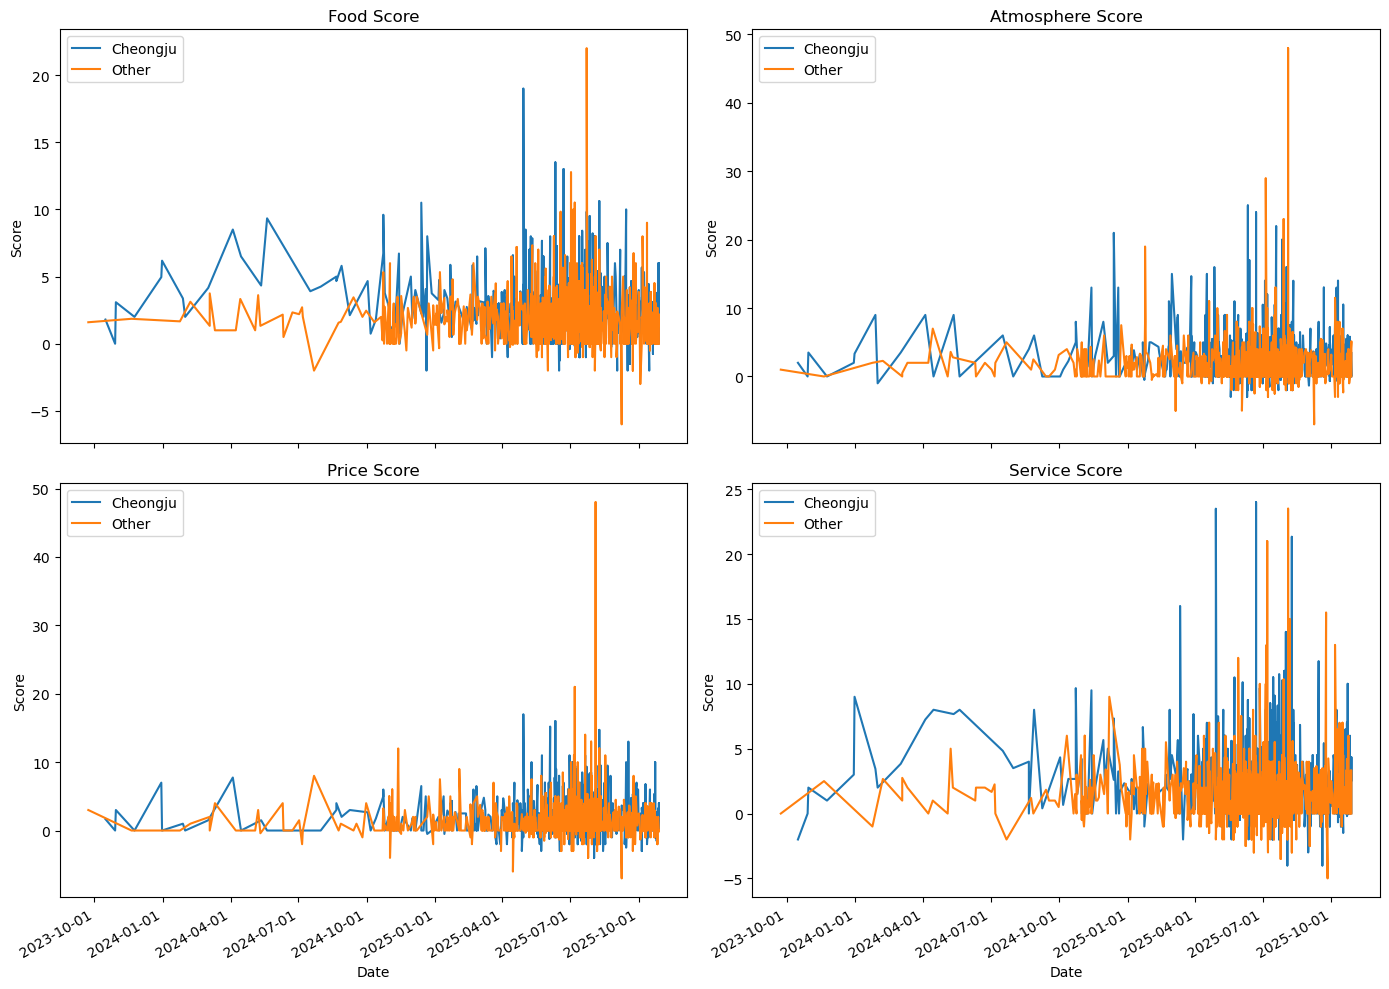

In [7]:
# Ensure date column is datetime
cheongju['date'] = pd.to_datetime(cheongju['date'])
other['date'] = pd.to_datetime(other['date'])

# Sort each dataframe by date so x-axis is chronological
cheongju_sorted_by_date = cheongju.sort_values('date')
other_sorted_by_date = other.sort_values('date')

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. 음식_점수 (date on x-axis)
axes[0, 0].plot(cheongju_sorted_by_date['date'], cheongju_sorted_by_date['음식_점수'], label='Cheongju', color='tab:blue')
axes[0, 0].plot(other_sorted_by_date['date'], other_sorted_by_date['음식_점수'], label='Other', color='tab:orange')
axes[0, 0].set_title('Food Score')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Score')
axes[0, 0].legend()

# 2. 분위기_점수
axes[0, 1].plot(cheongju_sorted_by_date['date'], cheongju_sorted_by_date['분위기_점수'], label='Cheongju', color='tab:blue')
axes[0, 1].plot(other_sorted_by_date['date'], other_sorted_by_date['분위기_점수'], label='Other', color='tab:orange')
axes[0, 1].set_title('Atmosphere Score')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Score')
axes[0, 1].legend()

# 3. 가격_점수
axes[1, 0].plot(cheongju_sorted_by_date['date'], cheongju_sorted_by_date['가격_점수'], label='Cheongju', color='tab:blue')
axes[1, 0].plot(other_sorted_by_date['date'], other_sorted_by_date['가격_점수'], label='Other', color='tab:orange')
axes[1, 0].set_title('Price Score')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Score')
axes[1, 0].legend()

# 4. 서비스_점수
axes[1, 1].plot(cheongju_sorted_by_date['date'], cheongju_sorted_by_date['서비스_점수'], label='Cheongju', color='tab:blue')
axes[1, 1].plot(other_sorted_by_date['date'], other_sorted_by_date['서비스_점수'], label='Other', color='tab:orange')
axes[1, 1].set_title('Service Score')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Score')
axes[1, 1].legend()

# Improve date formatting on x-axis
import matplotlib.dates as mdates
for ax in axes.flatten():
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [5]:
# other date min 내용 출력
print("Other Date Min Values:")
print(other['date'].min())
print()
# other date min에 대한 내용 출력
print(other[other['date'] == other['date'].min()])

Other Date Min Values:
2013-11-27

                                       title  \
343  대구 / 터미널 맛집 :: 20년 전통의 해장국, 추어탕 전문 영동식당   

                                               content        date  \
343  ﻿대구 / 터미널 맛집 :: 20년 전통의 해장국, 추어탕 전문 영동식당오랜만에 다...  2013-11-27   

                                       content_cleaned  \
343  ﻿대구 / 터미널 맛집 :: 20년 전통의 해장국, 추어탕 전문 영동식당오랜만에 다...   

                                                 음식_문장  \
343  ['아는 지인의 소개로 서울로 돌아오는 를 타기 전에 잠시 들러 점심을 먹게 된 곳...   

                                                분위기_문장 가격_문장  \
343  ['대룡씨가 이런 분위기의 식당이나 술집을 좋아해서 ....제가 방문했을 당시 점심...    []   

                                                서비스_문장  음식_점수  분위기_점수  가격_점수  \
343  ['우선 영동식당의 위치를 설명해 드릴께요', '걸어서 가기엔 조금 애매한 위치였으...    0.5     1.0    0.0   

     서비스_점수  
343     0.0  


In [8]:
import pandas as pd

#진천 데이터 불러오기
jincheon = pd.read_csv('./crawled_data/진천 식당_blog.csv')

#괴산 데이터 불러오기
goesan = pd.read_csv('./crawled_data/괴산 식당_blog.csv')

#단양 데이터 불러오기
danyang = pd.read_csv('./crawled_data/단양 식당_blog.csv')

#보은 데이터 불러오기
boeun = pd.read_csv('./crawled_data/보은 식당_blog.csv')

#영동 데이터 불러오기
yeongdong = pd.read_csv('./crawled_data/영동 식당_blog.csv')

#옥천 데이터 불러오기
okcheon = pd.read_csv('./crawled_data/옥천 식당_blog.csv')

#음성 데이터 불러오기
eumseong = pd.read_csv('./crawled_data/음성 식당_blog.csv')

#제천 데이터 불러오기
jecheon = pd.read_csv('./crawled_data/제천 식당_blog.csv')

#증평 데이터 불러오기
jeungpyeong = pd.read_csv('./crawled_data/증평 식당_blog.csv')

#충주 데이터 불러오기
chungju = pd.read_csv('./crawled_data/충주 식당_blog.csv')

In [9]:
# 각 데이터 [date] 컬럼의 최소값 출력
print("Jincheon Date Min:", jincheon['date'].min())
print("Goesan Date Min:", goesan['date'].min())
print("Danyang Date Min:", danyang['date'].min())
print("Boeun Date Min:", boeun['date'].min())
print("Yeongdong Date Min:", yeongdong['date'].min())
print("Okcheon Date Min:", okcheon['date'].min())
print("Eumseong Date Min:", eumseong['date'].min())
print("Jecheon Date Min:", jecheon['date'].min())
print("Jeungpyeong Date Min:", jeungpyeong['date'].min())
print("chungju Date Min:", chungju['date'].min())


Jincheon Date Min: 20190702
Goesan Date Min: 20130119
Danyang Date Min: 20240124
Boeun Date Min: 20130929
Yeongdong Date Min: 20110228
Okcheon Date Min: 20210803
Eumseong Date Min: 20060824
Jecheon Date Min: 20190811
Jeungpyeong Date Min: 20140607
chungju Date Min: 20230923


In [10]:
# 각 데이터 [date] 컬럼의 최대값 출력
print("Jincheon Date Max:", jincheon['date'].max())
print("Goesan Date Max:", goesan['date'].max())
print("Danyang Date Max:", danyang['date'].max())
print("Boeun Date Max:", boeun['date'].max())
print("Yeongdong Date Max:", yeongdong['date'].max())
print("Okcheon Date Max:", okcheon['date'].max())
print("Eumseong Date Max:", eumseong['date'].max())
print("Jecheon Date Max:", jecheon['date'].max())
print("Jeungpyeong Date Max:", jeungpyeong['date'].max())
print("chungju Date Max:", chungju['date'].max())

Jincheon Date Max: 20250809
Goesan Date Max: 20250807
Danyang Date Max: 20250810
Boeun Date Max: 20250809
Yeongdong Date Max: 20250809
Okcheon Date Max: 20250810
Eumseong Date Max: 20250810
Jecheon Date Max: 20250810
Jeungpyeong Date Max: 20250809
chungju Date Max: 20250809


In [19]:
import pandas as pd

# 원본 CSV 파일 경로

# 저장할 샘플 CSV 파일 경로
output_file = "sample_other.csv"

# CSV 파일 읽기 (메모리 절약을 위해 필요한 경우 nrows 옵션 사용)

# 앞에서 500행만 추출 (원하는 숫자로 변경 가능)
sample_df = other.sample(n=10, random_state=42)


# 새로운 CSV로 저장
sample_df.to_csv(output_file, index=False, encoding="utf-8-sig")

print("샘플 CSV 저장 완료:", output_file)


샘플 CSV 저장 완료: sample_other.csv


In [21]:
# 컬럼명 영어로 변경
rename_dict = {
    "음식_점수": "Food",
    "분위기_점수": "Atmosphere",
    "가격_점수": "Price",
    "서비스_점수": "Service"
}

cheongju = cheongju.rename(columns=rename_dict)
other = other.rename(columns=rename_dict)

C:\Users\user\AppData\Local\Temp\ipykernel_9336\3626220203.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df_melt, x="Category", y="Score", hue="region", ci="sd",


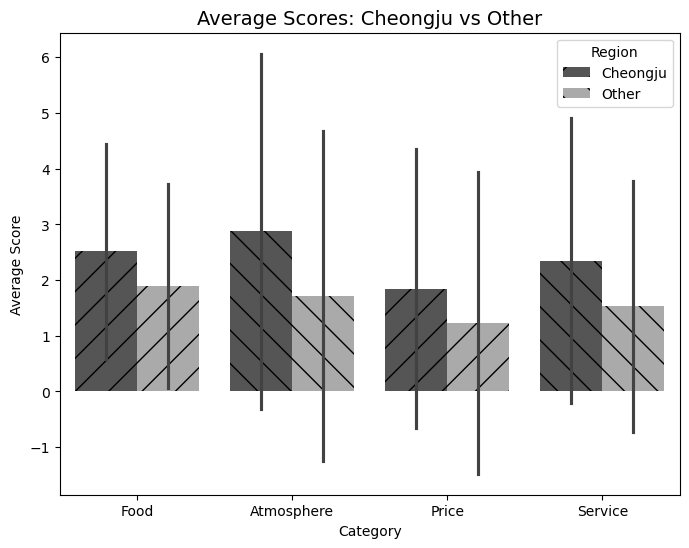

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

cheongju["region"] = "Cheongju"
other["region"] = "Other"
df = pd.concat([cheongju, other])

df_melt = df.melt(id_vars=["region"], 
                  value_vars=["Food","Atmosphere","Price","Service"],
                  var_name="Category", value_name="Score")

# region 컬럼이 있는 df_melt 사용
plt.figure(figsize=(8,6))
sns.barplot(data=df_melt, x="Category", y="Score", hue="region", ci="sd", 
            palette="gray")  # 흑백 팔레트

# 해칭 패턴 적용
bars = plt.gca().patches
hatches = ['/', '\\']  # Cheongju, Other 구분
for i, bar in enumerate(bars):
    bar.set_hatch(hatches[i % 2])

plt.title("Average Scores: Cheongju vs Other", fontsize=14)
plt.ylabel("Average Score")
plt.xlabel("Category")
plt.legend(title="Region")
plt.show()


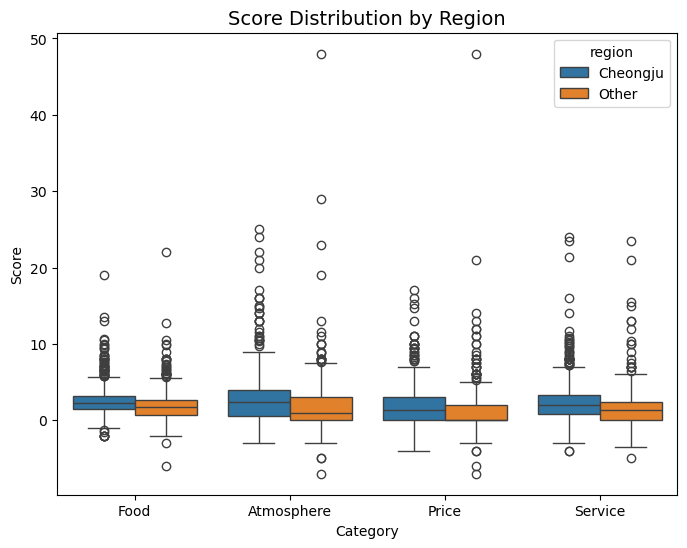

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_melt, x="Category", y="Score", hue="region", 
            palette="gray", showcaps=True, fliersize=3, linewidth=1)

plt.title("Score Distribution by Region", fontsize=14)
plt.ylabel("Score")
plt.xlabel("Category")
plt.legend(title="Region")
plt.show()

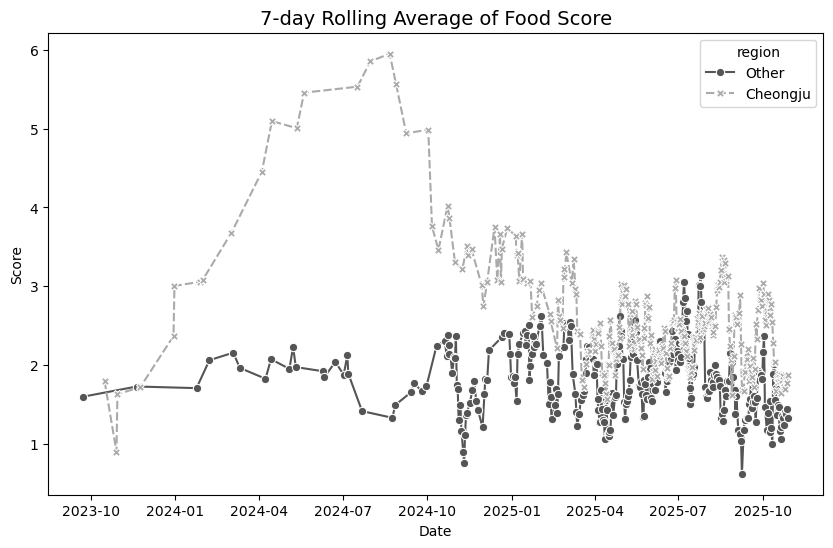

In [27]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_time, x="date", y="rolling_food", hue="region",
             style="region", markers=True, dashes=True, palette="gray")

plt.title("7-day Rolling Average of Food Score", fontsize=14)
plt.ylabel("Score")
plt.xlabel("Date")
plt.show()

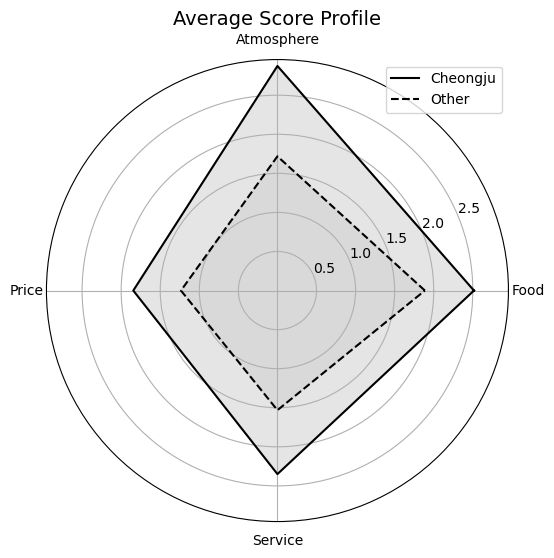

In [28]:
import numpy as np

categories = ["Food","Atmosphere","Price","Service"]

cheongju_mean = cheongju[categories].mean().values
other_mean = other[categories].mean().values

angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
cheongju_mean = np.concatenate((cheongju_mean,[cheongju_mean[0]]))
other_mean = np.concatenate((other_mean,[other_mean[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
ax.plot(angles, cheongju_mean, label="Cheongju", color="black", linestyle="-")
ax.fill(angles, cheongju_mean, alpha=0.1, color="black")
ax.plot(angles, other_mean, label="Other", color="black", linestyle="--")
ax.fill(angles, other_mean, alpha=0.05, color="black")

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title("Average Score Profile", fontsize=14)
plt.legend()
plt.show()


In [32]:
from scipy import stats

# 예: Food 점수 비교
t_stat, p_val = stats.ttest_ind(cheongju["Food"], other["Food"], equal_var=False)

print("Food Score t-test")
print("t-statistic:", t_stat)
print("p-value:", p_val)

Food Score t-test
t-statistic: 6.9597781500783045
p-value: 4.825420655501878e-12


In [33]:
categories = ["Food","Atmosphere","Price","Service"]

for cat in categories:
    t_stat, p_val = stats.ttest_ind(cheongju[cat], other[cat], equal_var=False)
    print(f"{cat} → t={t_stat:.3f}, p={p_val:.4f}")

Food → t=6.960, p=0.0000
Atmosphere → t=7.816, p=0.0000
Price → t=4.864, p=0.0000
Service → t=7.052, p=0.0000


In [34]:
for cat in categories:
    u_stat, p_val = stats.mannwhitneyu(cheongju[cat], other[cat], alternative="two-sided")
    print(f"{cat} (Mann-Whitney) → U={u_stat}, p={p_val:.4f}")

Food (Mann-Whitney) → U=460520.0, p=0.0000
Atmosphere (Mann-Whitney) → U=472533.5, p=0.0000
Price (Mann-Whitney) → U=441690.0, p=0.0000
Service (Mann-Whitney) → U=459552.5, p=0.0000
